In [1]:
#### import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

#Open a Zip File
from zipfile import ZipFile


#Image manipulation
from PIL import Image
print('imported')

imported


In [2]:
#unzip files
#Z and F in ZipFile always be capital whenever their usage in Python otherwise it will give error cannot import module 

train_zip= ZipFile("../data/train.zip",mode='r')


In [3]:
#read labels 
labels= pd.read_csv("../data/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels.shape

(10222, 2)

In [5]:
unique_breeds= labels['breed'].unique()
len(unique_breeds) 
total_breeds_taken= labels.groupby('breed')['breed'].count().reset_index(name= 'id').sort_values(by= 'id', ascending = False).head(20)
total_breeds_taken.head()

,breed,id
97,scottish_deerhound,126
73,maltese_dog,117
1,afghan_hound,116
42,entlebucher,115
11,bernese_mountain_dog,114


In [6]:
#make a list of breeds that are unique

unique_breeds= list(total_breeds_taken['breed'])
unique_breeds
len(unique_breeds)

20

In [7]:
#So most popular breed in dataset is scottish deerhound with 126 images. Lets look on one of them
import PIL.Image as Image
scottish_deerhound_id= labels.loc[labels['breed']== 'scottish_deerhound'].iloc[2,0]  #iloc 2 shows row number and 0 shows column index as in label csv there are only 2 columns
print(scottish_deerhound_id)
path= ("../data/train/")
print(path + scottish_deerhound_id + ".jpg")
#Image.open(path + scottish_deerhound_id + ".jpg")  #image format should be correctly filled


03dc61595ad9dbf49e3998cf586ca8cb
../data/train/03dc61595ad9dbf49e3998cf586ca8cb.jpg


In [8]:
imagesToRead= labels[labels['breed'].isin(unique_breeds)]
imagesToRead.head()
imagesToRead.shape

(2184, 2)

In [9]:
#as we know that by default here index is taken as breed so we need to reset index and as in initial stage we will take only top breeds (here 10 is taken) in order to easy calculation and training
total_label= (labels.groupby('breed')['breed'].count().reset_index(name='count').sort_values('count',ascending = False)).head(20)
total_label.head()


,breed,count
97,scottish_deerhound,126
73,maltese_dog,117
1,afghan_hound,116
42,entlebucher,115
11,bernese_mountain_dog,114


In [10]:
# so now from whole dataset we will consider these top 10 breed who have more number of images per breed
unique_breed_list = list(total_label.reset_index()['breed'])
unique_breed_list

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'leonberg',
 'cairn',
 'beagle',
 'japanese_spaniel',
 'australian_terrier',
 'blenheim_spaniel',
 'miniature_pinscher',
 'irish_wolfhound']

In [11]:

labels=labels[labels['breed'].isin(unique_breed_list)]
#print(np.array(labels).shape)
labels.shape

(2184, 2)

In [12]:
gross_breeds= imagesToRead["breed"]
gross_breed_list= (list(gross_breeds))

gross_breed_list[:11], "        ",len(gross_breed_list)

(['basenji',
  'scottish_deerhound',
  'maltese_dog',
  'cairn',
  'tibetan_terrier',
  'shih-tzu',
  'australian_terrier',
  'samoyed',
  'scottish_deerhound',
  'entlebucher',
  'entlebucher'],
 '        ',
 2184)

In [13]:
#filter the names of images of selected breeds that we will resize
image_names= imagesToRead["id"]
image_name_list= list(image_names)

len(image_name_list)

2184

In [14]:
#Now to create one hot encoded labels we need to create an array of zeroes
def get_encoder(unique_breed_list):
    zero_array=np.zeros([20,20])
    enc={}
    encoded=[[ 1.0 if i==k else 0.0 for i ,eachinside in enumerate(value)] for k,value in enumerate(zero_array)] 
    for breed,encoding in zip (unique_breed_list,encoded):
        enc[breed]= (encoding)
    return enc


encoder= get_encoder(unique_breeds)
print(encoder)

{'scottish_deerhound': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'maltese_dog': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'afghan_hound': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'entlebucher': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bernese_mountain_dog': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'shih-tzu': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'great_pyrenees': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'pomeranian': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'basenji': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [15]:
def encode_gross(gross_list,unique_list):
    encoded_list=[]
    
    for each in (gross_list):
        #print(each)
        encoder= get_encoder(unique_list)
        enc= encoder[each]
        #print(enc)
        encoded_list.append(enc)
    return encoded_list
        #return enc
gross_encoded_labels= encode_gross(gross_breed_list,unique_breeds)
encoded_labels= gross_encoded_labels


In [16]:
print(encoder["blenheim_spaniel"])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [17]:
unique_breed_label_list= [  each for each in range(len(unique_breeds))]
print("unique breed label list:  ", unique_breed_label_list)

unique breed label list:   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [18]:
def resize(image_nameslist,height= "300",width= "300"):
    train_dir_path= "../data/train/"
    resized_image_name_list= []
    print("resizing started")
    
    for ima in image_nameslist:  
        path= train_dir_path + ima + ".jpg"
        img= Image.open(path)
        resized_image = img.resize((height,width), Image.ANTIALIAS)
        resized_image_name_list.append(resized_image)
    print("resizing done")
    return resized_image_name_list

    #img_data= cv2.imread(path)
    #print(img_data)
    #cv2.imshow("image",img_data)
resized_imaname_list= resize(image_name_list,80,80)


resizing started
resizing done


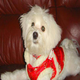

In [19]:
resized_imaname_list[2]

In [20]:
# convert image into black and white

def convert_to_monochrome(resized_imaname_list):
    converted_monochrome_image_list=[]
    print("monochrome conversion started..........")
    #converted_image_list=[]
    for eachimage_path in resized_imaname_list:
        each_img_data= np.array(eachimage_path)
        
        image = Image.fromarray(each_img_data)#fromarray take the numpy array as input.
        
        
        converted_image= image.convert('L')
        
#         print(converted_image)
#         print(converted_image[:1])
        converted_image= np.array(converted_image)   
        
        converted_image = np.clip(converted_image/255.0, 0.0, 1.0)
        
        
        
        converted_monochrome_image_list.append(converted_image)
        
    print("conversion done !!!!!")
    return converted_monochrome_image_list
    

monocolor_img_data_list= convert_to_monochrome(resized_imaname_list)
len(monocolor_img_data_list[1])

monochrome conversion started..........
conversion done !!!!!


80

In [21]:
####Flattened images data list

flattened_img_data_list= []
for index,ima in enumerate(monocolor_img_data_list):
    
    flattened_img= ima.flatten()
    flattened_img= flattened_img.tolist()
    
    flattened_img_data_list.append(flattened_img)
    
    
len(flattened_img_data_list[1])

6400

In [22]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128  

In [23]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 80

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 20

In [27]:
from sklearn.model_selection import train_test_split
monocolor_train_images,monocolor_test_images,monocolor_train_label,monocolor_test_label=train_test_split(flattened_img_data_list, encoded_labels, test_size=0.2)
# print("train_images:",np.array(monocolor_train_images).shape)
# print("train labels",np.array(monocolor_train_label).shape)
# print("test image:",np.array(monocolor_test_images).shape)
# print("test label", np.array(monocolor_test_label).shape)
# monocolor_test_label= np.array(monocolor_test_label)
monocolor_test_label_true_cls= np.argmax(monocolor_test_label,axis=1)
# monocolor_test_label_true_cls[0:20]
print(monocolor_test_label[0:2])
#print(monocolor_test_images[1])

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [32]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    images= np.array(images)
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

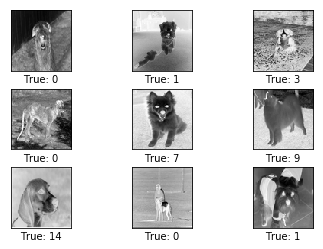

In [33]:
# Get the first images from the test-set.
images_test_data = monocolor_test_images[0:9]

# Get the true classes for those images.
test_true_cls= monocolor_test_label_true_cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images_test_data, cls_true=test_true_cls)

In [34]:
# our images are of 80 pixels
img_size = 80

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

#number of colour channels for each breed : 1 because we have converted images into a grey scale image
num_channels= 1

# Number of classes, one class for each of 20 selected breeds.
num_classes = 20

#dropout to reduce overfitting
dropout= 0.75

In [35]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [36]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [37]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [38]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [39]:
input_tensor = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='input_tensor')

In [40]:
reshaped_input_tensor = tf.reshape(input_tensor, [-1, img_size, img_size, num_channels])

In [41]:
label_tensor = tf.placeholder(tf.float32, shape=[None, num_classes], name='label_tensor')

In [42]:
label_tensor_true_cls = tf.argmax(label_tensor, axis=1)

In [43]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=reshaped_input_tensor,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [44]:
layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 40, 40, 16) dtype=float32>

In [45]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [46]:
layer_conv2

<tf.Tensor 'Relu_1:0' shape=(?, 20, 20, 36) dtype=float32>

In [47]:
layer_flat, num_features = flatten_layer(layer_conv2)

In [48]:
layer_flat

<tf.Tensor 'Reshape_1:0' shape=(?, 14400) dtype=float32>

In [49]:
num_features

14400

In [50]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

In [51]:
layer_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 128) dtype=float32>

In [52]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [53]:
layer_fc2

<tf.Tensor 'add_3:0' shape=(?, 20) dtype=float32>

In [54]:
prediction = tf.nn.softmax(layer_fc2)

In [55]:
prediction_cls = tf.argmax(prediction, axis=1)

In [56]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=label_tensor)

In [57]:
loss = tf.reduce_mean(cross_entropy)

In [58]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [59]:
correct_prediction = tf.equal(prediction_cls, label_tensor_true_cls)

In [60]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [61]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [64]:
def next_batch(batch_size, imgdata, imglabels):
    '''
    Return a total of `batch_size` random samples and labels. 
    '''
    idx = np.arange(0 , len(imgdata))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    imgdata_shuffle = [imgdata[i] for i in idx]
    imglabels_shuffle = [imglabels[i] for i in idx]

    return np.asarray(imgdata_shuffle), np.asarray(imglabels_shuffle)

In [65]:
# def get_batch(batch_size,train_label,train_images):

#     batched_img_datalist= []
#     batched_label_list= []
#     if len(train_images)== len(train_label):
#         total_batches= len(train_images)//batch_size
#         for i in range(total_batches):
#             start= i*batch_size
#             end= start+batch_size
        
#             batched_img_datalist.append(train_images[start:end])
#             batched_label_list.append(train_label[start:end])
           
    
#     return batched_img_datalist,batched_label_list
    

# batched_monocolor_image_data_andlabel_list= get_batch(9,monocolor_train_label,monocolor_train_images)
# print(np.array(batched_monocolor_image_data_andlabel_list[0]) .shape)
# print(np.array(batched_monocolor_image_data_andlabel_list[1]).shape)
# #print(len(batched_monocolor_image_data_andlabel_list[0][0]))

In [68]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # batch_images_data now holds a batch of images and
        # images_label are the true labels for those images.
        batch_images_data,images_label= next_batch(9,monocolor_train_images,monocolor_train_label)
        

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {input_tensor: batch_images_data,
                           label_tensor: images_label}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

In [71]:
optimize(num_iterations=3000)

Optimization Iteration:      1, Training Accuracy:   0.0%
Optimization Iteration:    101, Training Accuracy:   0.0%
Optimization Iteration:    201, Training Accuracy:   0.0%
Optimization Iteration:    301, Training Accuracy:   0.0%
Optimization Iteration:    401, Training Accuracy:   0.0%
Optimization Iteration:    501, Training Accuracy:   0.0%
Optimization Iteration:    601, Training Accuracy:  11.1%
Optimization Iteration:    701, Training Accuracy:  11.1%
Optimization Iteration:    801, Training Accuracy:  11.1%
Optimization Iteration:    901, Training Accuracy:  22.2%
Optimization Iteration:   1001, Training Accuracy:  11.1%
Optimization Iteration:   1101, Training Accuracy:  11.1%
Optimization Iteration:   1201, Training Accuracy:  22.2%
Optimization Iteration:   1301, Training Accuracy:   0.0%
Optimization Iteration:   1401, Training Accuracy:  33.3%
Optimization Iteration:   1501, Training Accuracy:  33.3%
Optimization Iteration:   1601, Training Accuracy:  11.1%
Optimization I

KeyboardInterrupt: 

In [155]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    test_images_data = monocolor_test_images[incorrect]
    
    # Get the predicted classes for those images.
    prediction_cls = prediction_cls[incorrect]

    # Get the true classes for those images.
    test_true_cls = monocolor_test_label_true_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=test_images_data[0:9],
                cls_true=test_true_cls[0:9],
                cls_pred=prediction_cls[0:9])

In [156]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = monocolor_test_label_true_cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(label_tensor=cls_true,
                          cls_pred=prediction_cls)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [157]:
optimize(num_iterations=1)

Optimization Iteration:      1, Training Accuracy:  22.2%


In [161]:
# # Split the test-set into smaller batches of this size.
# test_batch_size = 9

# def print_test_accuracy(show_example_errors=False,
#                         show_confusion_matrix=False):

#     # Number of images in the test-set.
#     num_test = len(monocolor_test_images)

#     # Allocate an array for the predicted classes which
#     # will be calculated in batches and filled into this array.
#     cls_pred = np.zeros(shape=num_test, dtype=np.int)

#     # Now calculate the predicted classes for the batches.
#     # We will just iterate through all the batches.
#     # There might be a more clever and Pythonic way of doing this.

#     # The starting index for the next batch is denoted i.
#     i = 0

#     while i < num_test:
#         # The ending index for the next batch is denoted j.
#         j = min(i + test_batch_size, num_test)

#         # Get the images from the test-set between index i and j.
#         test_images = (monocolor_test_images)[i:j][:]
        
        

#         # Get the associated labels.
#         test_labels = monocolor_test_label[i:j][:]
        

#         # Create a feed-dict with these images and labels.
#         feed_dict = {input_tensor: test_images,
#                      label_tensor: test_labels}

#         # Calculate the predicted class using TensorFlow.
#         prediction_cls[i:j] = session.run(prediction_cls, feed_dict=feed_dict)

# #         # Set the start-index for the next batch to the
# #         # end-index of the current batch.
# #         i = j

# #     # Convenience variable for the true class-numbers of the test-set.
# #     cls_true = monocolor_test_label_true_cls

# #     # Create a boolean array whether each image is correctly classified.
# #     correct = (cls_true == prediction_cls)

# #     # Calculate the number of correctly classified images.
# #     # When summing a boolean array, False means 0 and True means 1.
# #     correct_sum = correct.sum()

# #     # Classification accuracy is the number of correctly classified
# #     # images divided by the total number of images in the test-set.
# #     acc = float(correct_sum) / num_test

# #     # Print the accuracy.
# #     msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
# #     print(msg.format(acc, correct_sum, num_test))

# #     # Plot some examples of mis-classifications, if desired.
# #     if show_example_errors:
# #         print("Example errors:")
# #         plot_example_errors(cls_pred=prediction_cls, correct=correct)

# #     # Plot the confusion matrix, if desired.
# #     if show_confusion_matrix:
# #         print("Confusion Matrix:")
# #         plot_confusion_matrix(cls_pred=prediction_cls)

In [167]:
#while i < num_test:
test_batch_size=9
i=0
num_test = len(monocolor_test_images)
print(num_test)
j = min(i + test_batch_size, num_test)
print(monocolor_test_images)[i]
test_images = (monocolor_test_images)[i:j,:]

test_labels = monocolor_test_label[i:j][:]
print(test_images)
feed_dict = {input_tensor: test_images,
             label_tensor: test_labels}

437
[array([0.56078431, 0.56862745, 0.57647059, ..., 0.14509804, 0.19215686,
       0.14117647]), array([0.27058824, 0.26666667, 0.07843137, ..., 0.35294118, 0.45490196,
       0.49803922]), array([0.01960784, 0.03137255, 0.04705882, ..., 0.        , 0.        ,
       0.        ]), array([0.90196078, 0.90196078, 0.90196078, ..., 0.31372549, 0.31764706,
       0.3372549 ]), array([0.46666667, 0.45098039, 0.43137255, ..., 0.46666667, 0.45098039,
       0.39607843]), array([0.70588235, 0.69803922, 0.64313725, ..., 0.64313725, 0.74509804,
       0.56078431]), array([0.85882353, 0.85882353, 0.87058824, ..., 0.34509804, 0.35294118,
       0.42352941]), array([0.57254902, 0.49411765, 0.54509804, ..., 0.28627451, 0.28235294,
       0.25490196]), array([0.54901961, 0.54901961, 0.55294118, ..., 0.49019608, 0.50196078,
       0.49803922]), array([0.29019608, 0.04313725, 0.0745098 , ..., 0.48235294, 0.46666667,
       0.4745098 ]), array([0.36470588, 0.36862745, 0.30980392, ..., 0.19607843, 0.290

TypeError: 'NoneType' object is not subscriptable

In [162]:
print_test_accuracy()

TypeError: 'Tensor' object does not support item assignment

In [59]:
reshape_input_tensor.shape

TensorShape([Dimension(None), Dimension(500), Dimension(500), Dimension(1)])

In [311]:
[np.array(value) for i,value in enumerate(converted_image_data_list)]


[array([[135, 132, 126, ..., 108,  93,  93],
        [123, 119, 119, ..., 115,  94,  93],
        [136, 123, 119, ...,  89,  96,  91],
        ...,
        [ 58,  98, 234, ...,  32, 139,  99],
        [ 62,  82, 106, ..., 189, 217, 176],
        [ 90, 123,  48, ..., 108, 104,  56]], dtype=uint8),
 array([[  5,   5,   5, ...,  90,  88,  86],
        [  5,   5,   5, ...,  92,  90,  88],
        [  5,   6,   6, ...,  93,  91,  90],
        ...,
        [ 87,  65,  79, ...,  99, 100, 100],
        [ 82,  60,  94, ..., 100, 101, 101],
        [ 78,  57, 100, ..., 100, 101, 101]], dtype=uint8),
 array([[72, 67, 75, ..., 39, 39, 39],
        [67, 64, 72, ..., 39, 39, 39],
        [60, 62, 68, ..., 38, 38, 38],
        ...,
        [29, 23, 33, ..., 46, 45, 44],
        [30, 23, 30, ..., 46, 45, 44],
        [31, 23, 28, ..., 46, 45, 44]], dtype=uint8),
 array([[ 11,  15,  18, ...,  10,  19,  23],
        [ 12,  13,  14, ...,  18,  21,  26],
        [ 12,   9,   7, ...,  12,   8,  14],
       

In [2]:
#for in in converted_image_data_list]

def any_num(input_list, divider):
    count=0
    my_list=[]
    for i in input_list:
        count=count+1
        if count % divider==0:
            my_list.append(i)
       
    return my_list

def print_image_list(images):
    for ima in images:
        plt.figure()
        plt.imshow(ima)

In [3]:
images=any_num(converted_image_data_list,7)
print_image_list(images)  

NameError: name 'converted_image_data_list' is not defined

In [44]:
#shape = [filter_size, filter_size, num_input_channels, num_filters]
weights=  tf.Variable(tf.random_normal(shape= [8,8,1,20], stddev=0.05)) 
weights.shape


TensorShape([Dimension(8), Dimension(8), Dimension(1), Dimension(20)])

In [45]:
bias= tf.Variable(tf.random_normal([20]))
keep_prob= tf.placeholder(tf.float32)
bias.shape

TensorShape([Dimension(20)])

In [46]:
def conv2d(input_tensor,weights,bias,strides = 1):
    input_tensor= tf.nn.conv2d(input_tensor,weights,strides= [1,strides,strides,1],padding= 'SAME')
    input_tensor=tf.nn.bias_add(input_tensor,bias)
    return tf.nn.relu(input_tensor)
def max_pool(input_tensor,k=2):
    return tf.nn.max_pool(input_tensor,ksize= [1,k,k,1],strides= [1,k,k,1],padding= 'SAME')

In [47]:
#create model
def conv_net(input_tensor,weights,bias,dropout):
    #reshape input tensor # Tensor input become 4-D: [Batch Size, Height, Width,Channel]
    #The convolutional layers expect input to be encoded as a 4-dim tensor so we have to reshape it 
    reshape_input_tensor= tf.reshape(input_tensor,[-1,500,500,num_channels])
    
    #convolutional layer 1
    conv1= conv2d(input_tensor,weights['wc1'],bias['bc1'],) #wc means w=  weight,c= convlutional
    #maxpooling-to reduce the spatial size(only width and height, not depth),
    #reduces the number of parameters, hence computation is reduced.
    conv1= maxpool2d(conv1,k=2)
    
    #convoltion layer 2
    conv2= conv2d(conv1,weights['wc2'],bias['bc2'])
    conv2= maxpool2d(conv2,k=2)
    
    #fully connected layer or dense layer and get the shape of layer
    fc1= tf.reshape(conv2,[-1,weights['wd1'].getshape().as_list()])
    fc1= tf.add(tf.matmul(fc1,weight['wd1']),bias['bd1'])  # matrix multification
    fc1= tf.nn.relu(fc1)
    #apply drop out(to reduce overfitting- networks gives better accuracy in training set but fails in giving accuracy during testing)
    fc1= tf.nn.dropout(fc1,dropout)
    
    #output, class prediction
    output= tf.add(tf.matmul(fc1,weights['output'],bias['output']))
    return output

In [48]:
#store weights as dictonary
weights= {
    #4*4 convfilter, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([4,4,1,32])),
    #4*4 convfilter, 32 input ,64 outputs
    'wc2': tf.Variable(tf.random_normal([4,4,32,64])),
    #fully connected 12*12*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([8*8*64, 1024])), # 20 is number of classes or breeds here
    #1024 inputs , 20 out classes/breeds
    'output': tf.Variable(tf.random_normal([1024,num_classes]))
}
# store biases in form of dictonary
biases= {
    #bias for conv1
    'bc1': tf.Variable(tf.random_normal)



SyntaxError: unexpected EOF while parsing (<ipython-input-48-5be717686ef1>, line 15)